In [1]:
import pandas as pd
res_df = pd.read_csv('multipleChoiceResponses.csv', encoding='ISO-8859-1',low_memory=False)

In [2]:
res_df.shape

(16716, 228)

In [3]:
count_df=res_df[['Country','Age']].copy()
count_df['Age']=count_df['Age'].fillna(count_df['Age'].mean())
groupby_country=count_df.groupby('Country')
groupby_country_count=groupby_country.count()

In [4]:
groupby_country

In [5]:
groupby_country_count

,Age
Country,
Argentina,92
Australia,421
Belarus,54
Belgium,91
Brazil,465
Canada,440
Chile,51
Colombia,113
Czech Republic,53


In [6]:
drop_other = groupby_country_count.drop('Other')
top12_countries = drop_other.sort_values('Age', ascending=False).index[:12]

In [7]:
top12_countries

Index(['United States', 'India', 'Russia', 'United Kingdom',
       'People 's Republic of China', 'Brazil', 'Germany', 'France', 'Canada',
       'Australia', 'Spain', 'Japan'],
      dtype='object', name='Country')

In [8]:
res_df.set_index('Country',inplace=True)
res_df.head()

,GenderSelect,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
Country,,,,,,,,,,,,,,,,,,,,,
NaN,"Non-binary, genderqueer, or gender non-conforming",NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,Female,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
Canada,Male,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
United States,Male,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Taiwan,Male,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,Employed by a company that doesn't perform adv...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
drop_countries = res_df.index.difference(top12_countries)

In [10]:
drop_countries

Index([                nan,         'Argentina',           'Belarus',
                 'Belgium',             'Chile',          'Colombia',
          'Czech Republic',           'Denmark',             'Egypt',
                 'Finland',            'Greece',         'Hong Kong',
                 'Hungary',         'Indonesia',              'Iran',
                 'Ireland',            'Israel',             'Italy',
                   'Kenya',          'Malaysia',            'Mexico',
             'Netherlands',       'New Zealand',           'Nigeria',
                  'Norway',             'Other',          'Pakistan',
             'Philippines',            'Poland',          'Portugal',
       'Republic of China',           'Romania',         'Singapore',
            'South Africa',       'South Korea',            'Sweden',
             'Switzerland',            'Taiwan',            'Turkey',
                 'Ukraine',           'Vietnam'],
      dtype='object', name='Country')

In [11]:
res_df_drop_countries = res_df.drop(drop_countries)

In [12]:
res_df_drop_countries.shape

(11310, 227)

In [13]:
res_df_drop_countries.index.unique()

Index(['United States', 'Canada', 'Brazil', 'India', 'Australia', 'Russia',
       'United Kingdom', 'Germany', 'People 's Republic of China', 'Japan',
       'France', 'Spain'],
      dtype='object', name='Country')

In [14]:
type(top12_countries)

pandas.core.indexes.base.Index

In [15]:
res_df_extract_countries = res_df[res_df.index.isin(list(top12_countries))]

In [16]:
res_df_extract_countries.shape

(11310, 227)

In [17]:
# res_df['Country'].value_counts()

In [18]:
res_df.index.value_counts()

United States                  4197
India                          2704
Other                          1023
Russia                          578
United Kingdom                  535
People 's Republic of China     471
Brazil                          465
Germany                         460
France                          442
Canada                          440
Australia                       421
Spain                           320
Japan                           277
Taiwan                          254
Italy                           238
Netherlands                     205
Ukraine                         196
South Korea                     194
Singapore                       184
Poland                          184
Pakistan                        161
Turkey                          144
Indonesia                       131
Switzerland                     129
South Africa                    127
Mexico                          126
Colombia                        113
Iran                        

In [19]:
res_df[['CompensationAmount','CompensationCurrency']]

,CompensationAmount,CompensationCurrency
Country,,
NaN,NaN,NaN
United States,NaN,NaN
Canada,NaN,NaN
United States,"250,000",USD
Taiwan,NaN,NaN
Brazil,NaN,NaN
United States,NaN,NaN
India,NaN,NaN
Australia,80000,AUD


In [20]:
res_df = res_df_drop_countries

In [21]:
res_df.shape

(11310, 227)

In [22]:
res_df[['CompensationAmount','CompensationCurrency']].dropna().head()

,CompensationAmount,CompensationCurrency
Country,,
United States,"250,000",USD
Australia,80000,AUD
Russia,1200000,RUB
India,"95,000",INR
United States,20000,USD


In [23]:
res_df['CompensationAmount']

Country
United States                      NaN
Canada                             NaN
United States                  250,000
Brazil                             NaN
United States                      NaN
India                              NaN
Australia                        80000
Russia                         1200000
Russia                             NaN
India                           95,000
Brazil                             NaN
United States                  120,000
United Kingdom                     NaN
United States                      NaN
Brazil                             NaN
United States                      NaN
United States                    20000
United States                   100000
United States                      NaN
Russia                          624000
Germany                         150000
Canada                             NaN
United Kingdom                 130,000
Russia                             NaN
United States                   133000
Canada           

In [24]:
compensation_amount = res_df['CompensationAmount']
compensation_amount = compensation_amount.str.replace(',','')
compensation_amount = compensation_amount.str.replace('-','nan')
compensation_amount = compensation_amount.astype(float)

In [25]:
compensation_amount

Country
United States                        NaN
Canada                               NaN
United States                   250000.0
Brazil                               NaN
United States                        NaN
India                                NaN
Australia                        80000.0
Russia                         1200000.0
Russia                               NaN
India                            95000.0
Brazil                               NaN
United States                   120000.0
United Kingdom                       NaN
United States                        NaN
Brazil                               NaN
United States                        NaN
United States                    20000.0
United States                   100000.0
United States                        NaN
Russia                          624000.0
Germany                         150000.0
Canada                               NaN
United Kingdom                  130000.0
Russia                               NaN
United S

In [26]:
rates_df = pd.read_csv('conversionRates.csv',index_col='originCountry')

In [27]:
rates_df.index

Index(['USD', 'EUR', 'INR', 'GBP', 'BRL', 'RUB', 'CAD', 'AUD', 'JPY', 'CNY',
       'PLN', 'SGD', 'ZAR', 'CHF', 'MXN', 'TWD', 'COP', 'PKR', 'TRY', 'DKK',
       'IDR', 'KRW', 'PHP', 'IRR', 'SEK', 'HUF', 'NZD', 'CZK', 'ILS', 'ARS',
       'HKD', 'NGN', 'NOK', 'CLP', 'MYR', 'AED', 'KES', 'LKR', 'EGP', 'THB',
       'UAH', 'ALL', 'RON', 'MAD', 'RSD', 'AMD', 'BDT', 'PEN', 'UGX', 'VND',
       'XOF', 'HRK', 'NPR', 'BGN', 'ETB', 'KZT', 'TND', 'AFN', 'BHD', 'BIF',
       'BSD', 'DOP', 'GTQ', 'IQD', 'SDG', 'TTD', 'VEF', 'AZN', 'BAM', 'BYN',
       'CRC', 'CUP', 'DZD', 'GHS', 'ISK', 'JOD', 'MGA', 'MUR', 'OMR', 'PAB',
       'SAR', 'SVC', 'SZL', 'UYU', 'XAF', 'YER'],
      dtype='object', name='originCountry')

In [28]:
compensation_amount.values

array([    nan,     nan, 250000., ...,     nan,     nan,     nan])

In [29]:
compensation_amount_df = pd.DataFrame(compensation_amount.values, index=res_df['CompensationCurrency'],columns=['compensationAmount'])

In [30]:
# compensation_amount_df[:10,:10]

In [31]:
compensation_amount_df.dropna().iloc[:10,:10]

,compensationAmount
CompensationCurrency,
USD,250000.0
AUD,80000.0
RUB,1200000.0
INR,95000.0
NaN,120000.0
USD,20000.0
USD,100000.0
RUB,624000.0
EUR,150000.0


In [32]:
compensation_amount_df['exchangeRate'] = rates_df['exchangeRate']

In [33]:
compensation_amount_df

,compensationAmount,exchangeRate
CompensationCurrency,,
NaN,NaN,NaN
NaN,NaN,NaN
USD,250000.0,1.000000
NaN,NaN,NaN
NaN,NaN,NaN
NaN,NaN,NaN
AUD,80000.0,0.802310
RUB,1200000.0,0.017402
NaN,NaN,NaN


In [34]:
compensation_amount

Country
United States                        NaN
Canada                               NaN
United States                   250000.0
Brazil                               NaN
United States                        NaN
India                                NaN
Australia                        80000.0
Russia                         1200000.0
Russia                               NaN
India                            95000.0
Brazil                               NaN
United States                   120000.0
United Kingdom                       NaN
United States                        NaN
Brazil                               NaN
United States                        NaN
United States                    20000.0
United States                   100000.0
United States                        NaN
Russia                          624000.0
Germany                         150000.0
Canada                               NaN
United Kingdom                  130000.0
Russia                               NaN
United S

In [35]:
type(compensation_amount)

pandas.core.series.Series

In [36]:
type(compensation_amount_df)

pandas.core.frame.DataFrame

In [37]:
compensation_amount_df.size

22620

In [38]:
compensation_amount_df.columns

Index(['compensationAmount', 'exchangeRate'], dtype='object')

compensation_amount.head()

In [39]:
compensation_amount_df.head()

,compensationAmount,exchangeRate
CompensationCurrency,,
NaN,NaN,NaN
NaN,NaN,NaN
USD,250000.0,1.0
NaN,NaN,NaN
NaN,NaN,NaN


In [40]:
compensation_amount_df2 = pd.DataFrame(compensation_amount.values, index=res_df['CompensationCurrency'],columns=['compensationAmount'])

In [41]:
type(compensation_amount_df2)

pandas.core.frame.DataFrame

In [42]:
compensation_amount_df2.shape

(11310, 1)

In [43]:
rates_df

,Unnamed: 0,exchangeRate
originCountry,,
USD,1,1.000000
EUR,2,1.195826
INR,3,0.015620
GBP,4,1.324188
BRL,5,0.321350
RUB,6,0.017402
CAD,7,0.823688
AUD,8,0.802310
JPY,9,0.009108


In [44]:
compensation_amount

Country
United States                        NaN
Canada                               NaN
United States                   250000.0
Brazil                               NaN
United States                        NaN
India                                NaN
Australia                        80000.0
Russia                         1200000.0
Russia                               NaN
India                            95000.0
Brazil                               NaN
United States                   120000.0
United Kingdom                       NaN
United States                        NaN
Brazil                               NaN
United States                        NaN
United States                    20000.0
United States                   100000.0
United States                        NaN
Russia                          624000.0
Germany                         150000.0
Canada                               NaN
United Kingdom                  130000.0
Russia                               NaN
United S

In [45]:
compensation_amount_df

,compensationAmount,exchangeRate
CompensationCurrency,,
NaN,NaN,NaN
NaN,NaN,NaN
USD,250000.0,1.000000
NaN,NaN,NaN
NaN,NaN,NaN
NaN,NaN,NaN
AUD,80000.0,0.802310
RUB,1200000.0,0.017402
NaN,NaN,NaN


In [46]:
compensation_amount_df = compensation_amount_df.drop('exchangeRate',axis=1)

In [47]:
compensation_amount_df

,compensationAmount
CompensationCurrency,
NaN,NaN
NaN,NaN
USD,250000.0
NaN,NaN
NaN,NaN
NaN,NaN
AUD,80000.0
RUB,1200000.0
NaN,NaN


In [48]:
# test_df = pd.merge(compensation_amount_df,rates_df)

In [49]:
# test_df = pd.join(compensation_amount_df,rates_df)

In [50]:
test_df = compensation_amount_df.join(rates_df)

In [51]:
test_df

,compensationAmount,Unnamed: 0,exchangeRate
AED,5.000000e+03,36.0,0.272256
AED,2.000000e+04,36.0,0.272256
AED,0.000000e+00,36.0,0.272256
AED,0.000000e+00,36.0,0.272256
AFN,1.090000e+01,58.0,0.014570
ALL,NaN,42.0,0.008956
ALL,1.200000e+04,42.0,0.008956
ALL,2.000000e+04,42.0,0.008956
ALL,0.000000e+00,42.0,0.008956
ALL,1.000000e+02,42.0,0.008956


In [52]:
# compensation_amount_usd = compensation_amount_df['compensationAmount'] * compensation_amount_df['exchangeRate']

In [53]:
compensation_amount_df['exchangeRate'] = rates_df['exchangeRate']

In [54]:
compensation_amount_usd = compensation_amount_df['compensationAmount'] * compensation_amount_df['exchangeRate']

In [55]:
compensation_amount_usd

CompensationCurrency
NaN           NaN
NaN           NaN
USD    250000.000
NaN           NaN
NaN           NaN
NaN           NaN
AUD     64184.800
RUB     20882.400
NaN           NaN
INR      1483.900
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
USD     20000.000
USD    100000.000
NaN           NaN
RUB     10858.848
EUR    179373.900
NaN           NaN
GBP    172144.440
NaN           NaN
USD    133000.000
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
          ...    
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN           NaN
NaN    

In [56]:
compensation_amount_usd.dropna().head()

CompensationCurrency
USD    250000.0
AUD     64184.8
RUB     20882.4
INR      1483.9
USD     20000.0
dtype: float64

In [57]:
type(compensation_amount_usd)

pandas.core.series.Series

In [58]:
compensation_amount_usd.describe()

count    2.970000e+03
mean     9.681715e+06
std      5.192516e+08
min      0.000000e+00
25%      2.892150e+04
50%      6.500000e+04
75%      1.100000e+05
max      2.829740e+10
dtype: float64

In [59]:
res_df.describe()

,Age,LearningCategorySelftTaught,LearningCategoryOnlineCourses,LearningCategoryWork,LearningCategoryUniversity,LearningCategoryKaggle,LearningCategoryOther,TimeGatheringData,TimeModelBuilding,TimeProduction,TimeVisualizing,TimeFindingInsights,TimeOtherSelect
count,11127.000000,8940.000000,8958.000000,8941.000000,8950.000000,8954.000000,8933.000000,5138.000000,5138.000000,5128.000000,5138.000000,5133.000000,5127.000000
mean,32.590725,33.739877,27.175597,15.497748,16.343073,5.555685,1.952875,36.678863,20.610452,10.564840,13.823861,13.317748,2.511215
std,10.780248,25.874122,26.959106,19.147892,23.470056,11.031726,9.662433,21.873146,15.692140,12.170668,11.555720,13.542799,12.392724
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,20.000000,10.000000,0.000000,5.000000,5.000000,0.000000
50%,30.000000,30.000000,20.000000,10.000000,0.000000,0.000000,0.000000,35.000000,20.000000,10.000000,10.000000,10.000000,0.000000
75%,38.000000,50.000000,40.000000,25.000000,26.750000,10.000000,0.000000,50.000000,30.000000,15.000000,20.000000,20.000000,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,303.000000,100.000000


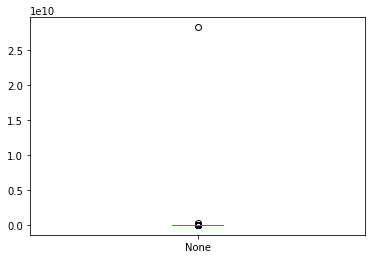

In [60]:
%matplotlib inline
compensation_amount_usd.plot.box()

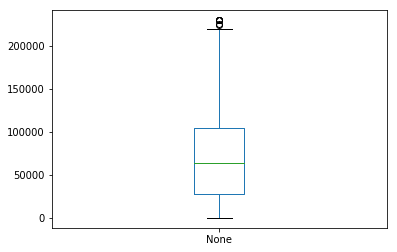

In [61]:
q1,q3 = compensation_amount_usd.describe()[['25%','75%']]
threshold = q3 + (q3 - q1) * 1.5
compensation_amount_usd = compensation_amount_usd.where(compensation_amount_usd < threshold)
compensation_amount_usd.plot.box()

In [62]:
threshold

231617.75

In [63]:
compensation_amount_usd.max()

230000.0

In [64]:
compensation_amount_usd.describe()

count      2896.000000
mean      71290.451204
std       52941.760927
min           0.000000
25%       28116.000000
50%       63756.000000
75%      105000.000000
max      230000.000000
dtype: float64

In [65]:
# q1,q3 = compensation_amount_usd.describe()['25%','75%']

In [66]:
q1,q3 = compensation_amount_usd.describe()[['25%','75%']]

In [67]:
q3 + (q3-q1) * 1.5

220326.0

In [68]:
res_df

,GenderSelect,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
Country,,,,,,,,,,,,,,,,,,,,,
United States,Female,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
Canada,Male,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
United States,Male,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,Male,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,Employed by college or university,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,Male,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,Employed by government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
India,Female,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,Employed by professional services/consulting firm,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
Australia,Female,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,Employed by non-profit or NGO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Russia,Male,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,Employed by a company that doesn't perform adv...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Russia,Female,20.0,"Not employed, and not looking for work",Yes,"Yes, I'm focused on learning mostly data scien...",NaN,NaN,NaN,NaN,NaN,...,Somewhat important,Very Important,Very Important,Somewhat important,Very Important,Somewhat important,Very Important,Very Important,Somewhat important,Somewhat important


In [69]:
res_df.shape

(11310, 227)

In [70]:
compensation_amount.shape

(11310,)

In [71]:
res_df['CompensationAmountUSD']=compensation_amount_usd.values

In [72]:
res_df.iloc[:5,-3]

Country
United States               NaN
Canada           Very Important
United States               NaN
Brazil                      NaN
United States               NaN
Name: JobFactorDiversity, dtype: object

In [73]:
res_df.iloc[:5,:-3]

,GenderSelect,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,...,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation
Country,,,,,,,,,,,,,,,,,,,,,
United States,Female,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important
Canada,Male,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
United States,Male,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,Male,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,Employed by college or university,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,Male,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,Employed by government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
res_df.iloc[:5,-3:]

,JobFactorDiversity,JobFactorPublishingOpportunity,CompensationAmountUSD
Country,,,
United States,NaN,NaN,NaN
Canada,Very Important,Very Important,NaN
United States,NaN,NaN,NaN
Brazil,NaN,NaN,NaN
United States,NaN,NaN,NaN


In [75]:
res_df.dropna().iloc[:5,-3:]

,JobFactorDiversity,JobFactorPublishingOpportunity,CompensationAmountUSD
Country,,,


In [76]:
res_df.columns

Index(['GenderSelect', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit', 'CurrentEmployerType',
       ...
       'JobFactorDepartment', 'JobFactorTitle', 'JobFactorCompanyFunding',
       'JobFactorImpact', 'JobFactorRemote', 'JobFactorIndustry',
       'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity', 'CompensationAmountUSD'],
      dtype='object', length=228)

In [77]:
len(res_df.columns)

228

In [78]:
res_df.columns

Index(['GenderSelect', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit', 'CurrentEmployerType',
       ...
       'JobFactorDepartment', 'JobFactorTitle', 'JobFactorCompanyFunding',
       'JobFactorImpact', 'JobFactorRemote', 'JobFactorIndustry',
       'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity', 'CompensationAmountUSD'],
      dtype='object', length=228)

In [79]:
res_df

,GenderSelect,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,...,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,CompensationAmountUSD
Country,,,,,,,,,,,,,,,,,,,,,
United States,Female,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN
Canada,Male,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN
United States,Male,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,Male,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,Employed by college or university,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,Male,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,Employed by government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
India,Female,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,Employed by professional services/consulting firm,...,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important,NaN
Australia,Female,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,Employed by non-profit or NGO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64184.800
Russia,Male,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,Employed by a company that doesn't perform adv...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20882.400
Russia,Female,20.0,"Not employed, and not looking for work",Yes,"Yes, I'm focused on learning mostly data scien...",NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Somewhat important,Very Important,Somewhat important,Very Important,Very Important,Somewhat important,Somewhat important,NaN


In [80]:
pd.set_option('display.max_colwidth',250)

In [81]:
res_df

,GenderSelect,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,...,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity,CompensationAmountUSD
Country,,,,,,,,,,,,,,,,,,,,,
United States,Female,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN,NaN
Canada,Male,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,NaN
United States,Male,56.0,"Independent contractor, freelancer, or self-employed",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,Male,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,Employed by college or university,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,Male,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,Employed by government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
India,Female,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,Employed by professional services/consulting firm,...,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important,NaN
Australia,Female,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,Employed by non-profit or NGO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64184.800
Russia,Male,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,Employed by a company that doesn't perform advanced analytics,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20882.400
Russia,Female,20.0,"Not employed, and not looking for work",Yes,"Yes, I'm focused on learning mostly data science skills",NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Somewhat important,Very Important,Somewhat important,Very Important,Very Important,Somewhat important,Somewhat important,NaN


In [82]:
pd.get_option('display.max_colwidth')

250

In [83]:
print(res_df.columns)

Index(['GenderSelect', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit', 'CurrentEmployerType',
       ...
       'JobFactorDepartment', 'JobFactorTitle', 'JobFactorCompanyFunding',
       'JobFactorImpact', 'JobFactorRemote', 'JobFactorIndustry',
       'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity', 'CompensationAmountUSD'],
      dtype='object', length=228)


In [84]:
for i in res_df.columns:
    print(i)

GenderSelect
Age
EmploymentStatus
StudentStatus
LearningDataScience
CodeWriter
CareerSwitcher
CurrentJobTitleSelect
TitleFit
CurrentEmployerType
MLToolNextYearSelect
MLMethodNextYearSelect
LanguageRecommendationSelect
PublicDatasetsSelect
LearningPlatformSelect
LearningPlatformUsefulnessArxiv
LearningPlatformUsefulnessBlogs
LearningPlatformUsefulnessCollege
LearningPlatformUsefulnessCompany
LearningPlatformUsefulnessConferences
LearningPlatformUsefulnessFriends
LearningPlatformUsefulnessKaggle
LearningPlatformUsefulnessNewsletters
LearningPlatformUsefulnessCommunities
LearningPlatformUsefulnessDocumentation
LearningPlatformUsefulnessCourses
LearningPlatformUsefulnessProjects
LearningPlatformUsefulnessPodcasts
LearningPlatformUsefulnessSO
LearningPlatformUsefulnessTextbook
LearningPlatformUsefulnessTradeBook
LearningPlatformUsefulnessTutoring
LearningPlatformUsefulnessYouTube
BlogsPodcastsNewslettersSelect
LearningDataScienceTime
JobSkillImportanceBigData
JobSkillImportanceDegree
JobSki

In [85]:
wt_freq_df = res_df.loc[:, res_df.columns.str.startswith('WorkToolsFrequency')].copy()

In [86]:
wt_freq_df

,WorkToolsFrequencyAmazonML,WorkToolsFrequencyAWS,WorkToolsFrequencyAngoss,WorkToolsFrequencyC,WorkToolsFrequencyCloudera,WorkToolsFrequencyDataRobot,WorkToolsFrequencyFlume,WorkToolsFrequencyGCP,WorkToolsFrequencyHadoop,WorkToolsFrequencyIBMCognos,...,WorkToolsFrequencySpark,WorkToolsFrequencySQL,WorkToolsFrequencyStan,WorkToolsFrequencyStatistica,WorkToolsFrequencyTableau,WorkToolsFrequencyTensorFlow,WorkToolsFrequencyTIBCO,WorkToolsFrequencyUnix,WorkToolsFrequencySelect1,WorkToolsFrequencySelect2
Country,,,,,,,,,,,,,,,,,,,,,
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,Rarely,Often,NaN,NaN,Rarely,NaN,NaN,NaN,Rarely,NaN,...,NaN,Often,NaN,NaN,Rarely,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Often,NaN,NaN,NaN,Often,NaN,NaN,NaN,NaN
United States,NaN,NaN,NaN,Sometimes,Most of the time,NaN,NaN,NaN,Most of the time,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Most of the time,NaN,NaN
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Most of the time,NaN,NaN,NaN,NaN,NaN,Most of the time,NaN,NaN
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
wt_freq_df.columns = wt_freq_df.columns.map(lambda x: x.replace('WorkToolsFrequency',''))

In [88]:
wt_freq_df.columns

Index(['AmazonML', 'AWS', 'Angoss', 'C', 'Cloudera', 'DataRobot', 'Flume',
       'GCP', 'Hadoop', 'IBMCognos', 'IBMSPSSModeler', 'IBMSPSSStatistics',
       'IBMWatson', 'Impala', 'Java', 'Julia', 'Jupyter', 'KNIMECommercial',
       'KNIMEFree', 'Mathematica', 'MATLAB', 'Azure', 'Excel',
       'MicrosoftRServer', 'MicrosoftSQL', 'Minitab', 'NoSQL', 'Oracle',
       'Orange', 'Perl', 'Python', 'Qlik', 'R', 'RapidMinerCommercial',
       'RapidMinerFree', 'Salfrod', 'SAPBusinessObjects', 'SASBase',
       'SASEnterprise', 'SASJMP', 'Spark', 'SQL', 'Stan', 'Statistica',
       'Tableau', 'TensorFlow', 'TIBCO', 'Unix', 'Select1', 'Select2'],
      dtype='object')

In [89]:
freqs = wt_freq_df.iloc[:,0].unique()

In [90]:
freqs

array([nan, 'Rarely', 'Sometimes', 'Often', 'Most of the time'],
      dtype=object)

In [91]:
# wt_freq_count_df['total'] = wt_freq_count_df.sum(axis=1)

In [92]:
# wt_freq_count_df

In [93]:
wt_freq_count_df = pd.DataFrame([],index = wt_freq_df.columns)

In [94]:
for freq in freqs[1:]:
    print(freq)
    wt_freq_count_df[freq] = (wt_freq_df == freq).sum()

Rarely
Sometimes
Often
Most of the time


In [95]:
for freq in freqs[1:]:
    bool_matrix = (wt_freq_df == freq)
    print(freq)
    display(bool_matrix)

Rarely


,AmazonML,AWS,Angoss,C,Cloudera,DataRobot,Flume,GCP,Hadoop,IBMCognos,...,Spark,SQL,Stan,Statistica,Tableau,TensorFlow,TIBCO,Unix,Select1,Select2
Country,,,,,,,,,,,,,,,,,,,,,
United States,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Canada,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
United States,True,False,False,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
Brazil,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
United States,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
India,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Australia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Russia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Russia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Sometimes


,AmazonML,AWS,Angoss,C,Cloudera,DataRobot,Flume,GCP,Hadoop,IBMCognos,...,Spark,SQL,Stan,Statistica,Tableau,TensorFlow,TIBCO,Unix,Select1,Select2
Country,,,,,,,,,,,,,,,,,,,,,
United States,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Canada,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
United States,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Brazil,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
United States,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
India,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Australia,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
Russia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Russia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Often


,AmazonML,AWS,Angoss,C,Cloudera,DataRobot,Flume,GCP,Hadoop,IBMCognos,...,Spark,SQL,Stan,Statistica,Tableau,TensorFlow,TIBCO,Unix,Select1,Select2
Country,,,,,,,,,,,,,,,,,,,,,
United States,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Canada,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
United States,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
Brazil,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
United States,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
India,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Australia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Russia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Russia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Most of the time


,AmazonML,AWS,Angoss,C,Cloudera,DataRobot,Flume,GCP,Hadoop,IBMCognos,...,Spark,SQL,Stan,Statistica,Tableau,TensorFlow,TIBCO,Unix,Select1,Select2
Country,,,,,,,,,,,,,,,,,,,,,
United States,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Canada,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
United States,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Brazil,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
United States,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
India,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Australia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Russia,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
Russia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [96]:
bool_matrix

,AmazonML,AWS,Angoss,C,Cloudera,DataRobot,Flume,GCP,Hadoop,IBMCognos,...,Spark,SQL,Stan,Statistica,Tableau,TensorFlow,TIBCO,Unix,Select1,Select2
Country,,,,,,,,,,,,,,,,,,,,,
United States,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Canada,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
United States,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Brazil,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
United States,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
India,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Australia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Russia,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
Russia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [97]:
wt_freq_count_df['total'] = wt_freq_count_df.sum(axis=1)

In [98]:
wt_freq_count_df.sort_values('total', ascending=False, inplace=True)

In [99]:
wt_freq_count_df

,Rarely,Sometimes,Often,Most of the time,total
Python,241,699,908,2304,4152
R,326,795,719,1339,3179
SQL,117,513,825,1455,2910
Jupyter,174,521,589,939,2223
TensorFlow,225,554,399,292,1470
AWS,247,368,382,394,1391
Unix,55,245,468,572,1340
Tableau,221,376,286,271,1154
C,248,331,215,203,997
NoSQL,127,376,284,195,982


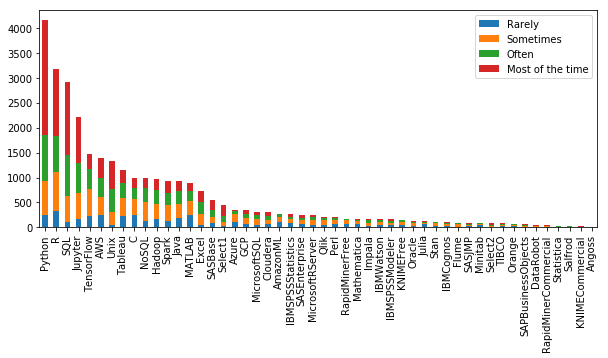

In [100]:
wt_freq_count_df.iloc[:,:-1].plot.bar(stacked=True, figsize=(10,4))

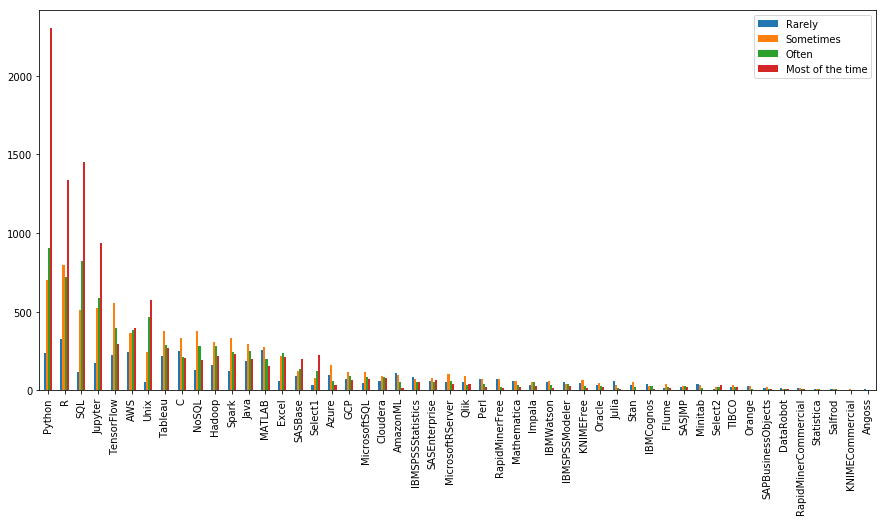

In [101]:
wt_freq_count_df.iloc[:,:-1].plot.bar(stacked=False, figsize=(15,7))

In [102]:
tools_salary_df = wt_freq_df.copy()

In [103]:
tools_salary_df = tools_salary_df.isin(['Most of the time','Often'])

In [104]:
tools_salary_df

,AmazonML,AWS,Angoss,C,Cloudera,DataRobot,Flume,GCP,Hadoop,IBMCognos,...,Spark,SQL,Stan,Statistica,Tableau,TensorFlow,TIBCO,Unix,Select1,Select2
Country,,,,,,,,,,,,,,,,,,,,,
United States,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Canada,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
United States,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
Brazil,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False
United States,False,False,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
India,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Australia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Russia,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
Russia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [105]:
for tool in tools_salary_df.columns:
    tools_salary_df[tool] = res_df['CompensationAmountUSD'].where(tools_salary_df[tool])

In [106]:
sort_by_median = tools_salary_df.median().sort_values(ascending=False).index

In [107]:
tools_salary_df = tools_salary_df.loc[:,sort_by_median]

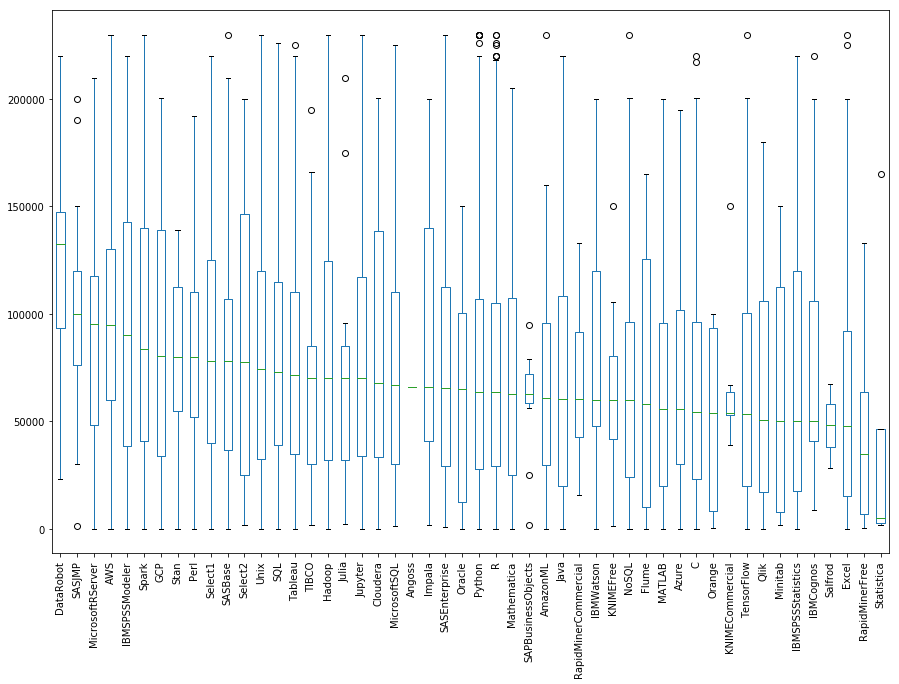

In [108]:
tools_salary_df.plot.box(figsize=(15,10), rot=90)

In [109]:
tools_salary_df.describe()

,DataRobot,SASJMP,MicrosoftRServer,AWS,IBMSPSSModeler,Spark,GCP,Stan,Perl,Select1,...,KNIMECommercial,TensorFlow,Qlik,Minitab,IBMSPSSStatistics,IBMCognos,Salfrod,Excel,RapidMinerFree,Statistica
count,10.000000,29.000000,48.000000,453.000000,35.000000,286.000000,84.000000,13.000000,37.000000,227.000000,...,6.000000,379.000000,44.000000,7.000000,50.000000,23.000000,3.000000,251.000000,18.000000,4.000000
mean,121407.200000,99758.920000,87725.302187,95539.438062,95397.156857,90535.004624,83563.069494,76960.758843,84800.780865,85457.492389,...,69381.780667,65200.650780,62100.352631,63146.542857,68412.353736,78300.563652,47932.338667,59341.277849,40317.681111,44268.559000
std,64701.952869,43902.708708,53202.748401,53259.358617,67478.677368,59187.614367,56576.808110,45677.372743,46565.401766,57889.145663,...,40474.417859,54647.042013,50133.024482,63332.894885,60765.132739,59929.380702,19714.017284,50792.437334,38996.776691,80518.355675
min,23000.000000,1171.500000,0.000000,0.000000,4.104000,64.574604,0.158813,0.000000,100.000000,57.843000,...,39050.000000,0.000000,27.314750,1562.000000,0.000000,8591.000000,28116.000000,0.000000,390.500000,1914.220000
25%,93310.000000,76000.000000,48062.210000,59791.300000,38269.000000,40740.063000,33767.800000,54648.000000,51892.344000,39862.820000,...,52915.300500,19876.410000,16986.750000,7731.900000,17767.750000,40787.000000,38127.300000,15424.750000,6853.275000,2773.555000
50%,132500.000000,100000.000000,95333.040000,95000.000000,90000.000000,83707.820000,80234.400000,80120.342000,79996.200000,78000.000000,...,53812.170000,53539.720000,50694.760000,50000.000000,50000.000000,50000.000000,48138.600000,47670.768000,34690.000000,5080.008000
75%,147500.000000,120000.000000,117788.861000,130000.000000,142830.340000,139759.935000,139208.985000,112323.400000,110000.000000,125000.000000,...,63703.042500,100224.692000,105877.823750,112500.000000,120000.000000,106161.700000,57840.508000,92150.000000,63703.042500,46575.012000
max,220000.000000,200000.000000,210000.000000,230000.000000,220000.000000,230000.000000,200577.500000,139039.740000,192000.000000,220000.000000,...,150000.000000,230000.000000,180000.000000,150000.000000,220000.000000,220000.000000,67542.416000,230000.000000,133000.000000,165000.000000


In [110]:
sort_by_count = tools_salary_df.count().sort_values(ascending=False)

In [111]:
sort_by_count

Python                  1776
SQL                     1309
R                       1153
Jupyter                  889
Unix                     616
AWS                      453
TensorFlow               379
Tableau                  316
Hadoop                   290
Spark                    286
NoSQL                    282
Excel                    251
Java                     236
Select1                  227
C                        218
MATLAB                   181
SASBase                  179
Cloudera                  86
GCP                       84
MicrosoftSQL              69
SASEnterprise             64
IBMSPSSStatistics         50
MicrosoftRServer          48
Impala                    45
Azure                     45
Qlik                      44
Perl                      37
AmazonML                  37
Select2                   35
IBMSPSSModeler            35
SASJMP                    29
IBMWatson                 29
Mathematica               26
IBMCognos                 23
Oracle        

In [112]:
over50_count = tools_salary_df.columns.where(tools_salary_df.count()>=50)

In [113]:
over50_count = over50_count.dropna()

In [114]:
tools_salary_df

,DataRobot,SASJMP,MicrosoftRServer,AWS,IBMSPSSModeler,Spark,GCP,Stan,Perl,Select1,...,KNIMECommercial,TensorFlow,Qlik,Minitab,IBMSPSSStatistics,IBMCognos,Salfrod,Excel,RapidMinerFree,Statistica
Country,,,,,,,,,,,,,,,,,,,,,
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Russia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
tools_salary_df = tools_salary_df[list(over50_count)]

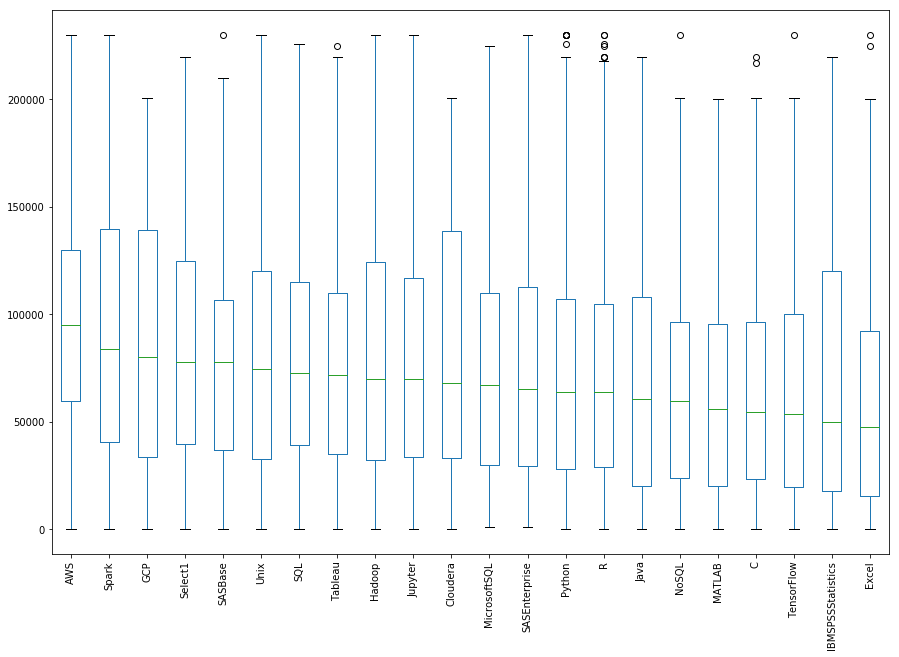

In [116]:
tools_salary_df.plot.box(figsize=(15,10), rot=90)

In [119]:
tools_salary_df.shape

(11310, 22)

In [118]:
len(over50_count)

22